# Modeling | US Inflation

# Table of Contents<a id='#home'></a>
* [5.0 Modeling](#data_m)
  * [5.1 Content](#content)
  * [5.2 Import Libs](#libs)
  * [5.3 File Imports](#files)
  * [5.4 Modeling](#modeling)
    * [5.4.1 Standard Scaler X & y (SS)](#ss_both)
    * [5.4.2 Standard Scaler X only (SS_y_uns)](#ss_y_un)
    * [5.4.3 Log Transformation X & y (LG)](#lg_both)
    * [5.4.4 Log Transformation X only (LG_y_uns)](#lg_y_un)
    * [5.4.5 Combination of Standard Scaler & Log Transformation for X only (SS_LG)](#combo)
  * [5.5 Initial Findings](#int_find)
  * [5.6 Modeling with Most important Variables](#mod_imp)
    * [5.6.1 Standard Scaler X & y (SS_two)](#ss_imp)
    * [5.6.2 Standard Scaler 2 X only (SS_y_uns_two)](#ss_imp_uns)
    * [5.6.3 Log Transformation X & y (LG_two)](#lg_imp)
    * [5.6.4 Log Transformation X & y (LG_y_uns_two)](#ss_lg_imp)
    * [5.6.5 Combination of Standard Scaler & Log Transformation for X only (SS_LG_two)](#ss_lg_imp_n)
  * [5.7 Conclusion](#conclusion)


## 5.1 Content<a id='content'></a>

In this notebook, we now take our model for `Inflation` gain some insights into what explicitly drives `Inflation`. 

## 5.2 Libraries<a id='libs'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

# may not need these but better to include
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


## 5.3 File Imports<a id='files'></a>

In [2]:
cd

C:\Users\rands


In [3]:
# StandardScaler | X & y scaled
X_train_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS.xlsx', index_col=None)
y_train_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS.xlsx', index_col=None)
X_test_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS.xlsx', index_col=None)
y_test_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS.xlsx', index_col=None)

# Standard Scaler | X only scaled
X_train_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx', index_col=None)
y_train_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx', index_col=None)
X_test_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx', index_col=None)
y_test_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx', index_col=None)

# Log Scaler | X & y scaled
X_train_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG.xlsx', index_col=None)
y_train_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG.xlsx', index_col=None)
X_test_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG.xlsx', index_col=None)
y_test_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# Log Scaler | X only scaled
X_train_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx', index_col=None)
y_train_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx', index_col=None)
X_test_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx', index_col=None)
y_test_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx', index_col=None)
y_tr_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx', index_col=None)
X_te_SS_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx', index_col=None)
y_te_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_te_y_uns.xlsx', index_col=None)

print('Finished; proceed.')

Finished; proceed.


**Confirming the files were imported / saved correctly**

In this section **we will double review the process is moving smoothly**; i.e. what was saved & imported is correct via the describe method; apologies in advance if this is long; **prudent to assume they are correct if I continue thereafter so please feel free to skip.**

`Mean` should be 0 `Std` should be 1

In [4]:
X_train_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,156.726027,5.931328e-17,3.700743e-17,-5.132088e-17,6.666408e-17,-4.816036e-17,-5.272292e-17,-2.712189e-17,-1.419463e-17,8.618170e-18,-7.097316e-18,5.829938e-18,4.511865e-17,-3.097155e-18,-8.998383e-17,-2.382670e-17,2.192564e-17,2.838926e-17,-1.013902e-18,2.585451e-17
std,89.981485,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,0.000000,-6.062318e+00,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-7.795038e+00,-3.095494e+00,-9.068365e+00,-8.151908e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00,-3.918715e+00,-3.862139e+00
25%,80.500000,-2.622508e-01,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-2.299928e-01,-5.887966e-01,-1.372215e-01,-1.434068e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01,-2.860298e-01,-1.127636e-01
50%,156.000000,1.137130e-01,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,1.645101e-01,-1.044398e-01,4.201600e-02,8.882293e-02,-7.649249e-02,-6.581613e-02,5.368868e-02,-1.463112e-01,-8.392462e-02
75%,234.500000,4.862085e-01,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,4.722769e-01,5.366638e-01,3.889674e-01,3.109964e-01,5.600397e-01,5.883282e-01,5.819297e-01,8.655327e-02,-4.724902e-02
max,312.000000,3.088234e+00,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.018575e+00,2.995122e+00,2.102794e+00,5.751485e+00,3.904325e+00,3.577091e+00,3.428937e+00,1.014630e+01,1.121655e+01


In [5]:
X_train_SS.head()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
0,79,0.155334,-0.394343,-0.050438,-0.073618,-0.719903,1.188751,0.975637,-0.227010,-0.047364,0.180722,0.182841,-0.428209,-0.474105,-0.710077,-0.991708,-0.877857,-0.042584,-0.658613,-0.074521
1,147,1.806193,1.153919,1.281250,-1.009767,0.519004,0.795288,-0.229392,-1.092126,2.638157,-0.672091,0.285280,2.017779,-0.752247,-0.968334,0.824884,-0.392888,-1.198573,0.272845,0.005413
2,143,0.839935,1.325041,1.617048,1.473924,0.386982,1.452307,-0.343536,1.043552,0.860496,-0.402545,-0.609323,2.134135,-0.076748,0.011209,-0.313841,-0.144765,-1.338341,0.226272,0.002279
3,72,-0.973142,-0.893565,-0.672374,-0.346680,-0.728908,-0.755915,1.271247,-1.276567,-2.828086,0.156371,0.029400,-1.855634,-0.028845,-0.245840,-1.409963,0.464266,1.346968,-0.472321,-0.120914
4,305,0.444882,-0.061075,0.211822,-0.088711,-0.318956,1.977440,0.290332,-1.247601,-0.172028,-0.234272,-0.045844,-0.032272,0.486909,-0.074694,2.067899,-1.047033,-1.610586,0.272845,-0.009006


In [6]:
X_train_SS = X_train_SS.drop(['Unnamed: 0'], axis=1)

In [7]:
y_train_SS.describe()

,Unnamed: 0,Inflation_SS
count,219.000000,2.190000e+02
mean,156.726027,-4.258390e-17
std,89.981485,1.002291e+00
min,0.000000,-5.602840e+00
25%,80.500000,-4.524383e-01
50%,156.000000,2.396356e-02
75%,234.500000,4.389885e-01
max,312.000000,4.747064e+00


In [8]:
y_train_SS = y_train_SS.drop(['Unnamed: 0'], axis=1)

In [9]:
X_test_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,154.308511,-0.039725,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,0.125599,-0.002570,0.018809,0.098847,-0.019342,-0.030541,0.078927,-0.153743,-0.203085
std,92.158935,1.033855,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.414106,1.234954,1.128372,1.285664,1.025338,0.992570,0.969684,1.642094,1.035767
min,3.000000,-7.038150,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-8.154967,-2.789248,-9.068365,-8.151908,-2.047304,-3.235033,-2.042697,-6.014495,-8.023722
25%,76.250000,-0.406660,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.174471,-0.705320,-0.134090,-0.082749,-0.753886,-0.663569,-0.584194,-0.332603,-0.111902
50%,152.500000,0.156537,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,0.203446,-0.057043,0.118361,0.112455,-0.114992,-0.043259,-0.001132,-0.192884,-0.088470
75%,228.750000,0.430470,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.458757,0.457160,0.421551,0.420592,0.517627,0.419153,0.727001,-0.006593,-0.064255
max,310.000000,2.087383,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,6.202835,4.012835,2.102794,5.751485,3.911693,3.125957,2.542070,12.894097,3.734413


In [10]:
X_test_SS = X_test_SS.drop(['Unnamed: 0'], axis=1)

In [11]:
y_test_SS.describe()

,Unnamed: 0,Inflation_SS
count,94.000000,94.000000
mean,154.308511,0.120276
std,92.158935,0.890655
min,3.000000,-4.175388
25%,76.250000,-0.288767
50%,152.500000,0.063128
75%,228.750000,0.502411
max,310.000000,3.346501


In [12]:
y_test_SS = y_test_SS.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [13]:
X_train_SS_y_uns.describe()

,Unnamed: 0,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,156.726027,5.931328e-17,3.700743e-17,-5.132088e-17,6.666408e-17,-4.816036e-17,-5.272292e-17,-2.712189e-17,-1.419463e-17,8.618170e-18,-7.097316e-18,5.829938e-18,4.511865e-17,-3.097155e-18,-8.998383e-17,-2.382670e-17,2.192564e-17,2.838926e-17,-1.013902e-18,2.585451e-17
std,89.981485,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,0.000000,-6.062318e+00,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-7.795038e+00,-3.095494e+00,-9.068365e+00,-8.151908e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00,-3.918715e+00,-3.862139e+00
25%,80.500000,-2.622508e-01,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-2.299928e-01,-5.887966e-01,-1.372215e-01,-1.434068e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01,-2.860298e-01,-1.127636e-01
50%,156.000000,1.137130e-01,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,1.645101e-01,-1.044398e-01,4.201600e-02,8.882293e-02,-7.649249e-02,-6.581613e-02,5.368868e-02,-1.463112e-01,-8.392462e-02
75%,234.500000,4.862085e-01,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,4.722769e-01,5.366638e-01,3.889674e-01,3.109964e-01,5.600397e-01,5.883282e-01,5.819297e-01,8.655327e-02,-4.724902e-02
max,312.000000,3.088234e+00,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.018575e+00,2.995122e+00,2.102794e+00,5.751485e+00,3.904325e+00,3.577091e+00,3.428937e+00,1.014630e+01,1.121655e+01


In [14]:
X_train_SS_y_uns = X_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [15]:
y_train_SS_y_uns.describe()

,Unnamed: 0,Inflation
count,219.000000,219.000000
mean,156.726027,-0.053498
std,89.981485,0.857330
min,0.000000,-4.846000
25%,80.500000,-0.440500
50%,156.000000,-0.033000
75%,234.500000,0.322000
max,312.000000,4.007000


In [16]:
y_train_SS_y_uns = y_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [17]:
X_test_SS_y_uns.describe()

,Unnamed: 0,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,154.308511,-0.039725,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,0.125599,-0.002570,0.018809,0.098847,-0.019342,-0.030541,0.078927,-0.153743,-0.203085
std,92.158935,1.033855,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.414106,1.234954,1.128372,1.285664,1.025338,0.992570,0.969684,1.642094,1.035767
min,3.000000,-7.038150,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-8.154967,-2.789248,-9.068365,-8.151908,-2.047304,-3.235033,-2.042697,-6.014495,-8.023722
25%,76.250000,-0.406660,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.174471,-0.705320,-0.134090,-0.082749,-0.753886,-0.663569,-0.584194,-0.332603,-0.111902
50%,152.500000,0.156537,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,0.203446,-0.057043,0.118361,0.112455,-0.114992,-0.043259,-0.001132,-0.192884,-0.088470
75%,228.750000,0.430470,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.458757,0.457160,0.421551,0.420592,0.517627,0.419153,0.727001,-0.006593,-0.064255
max,310.000000,2.087383,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,6.202835,4.012835,2.102794,5.751485,3.911693,3.125957,2.542070,12.894097,3.734413


In [18]:
X_test_SS_y_uns = X_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [19]:
y_test_SS_y_uns.describe()

,Unnamed: 0,Inflation_SS
count,94.000000,94.000000
mean,154.308511,0.120276
std,92.158935,0.890655
min,3.000000,-4.175388
25%,76.250000,-0.288767
50%,152.500000,0.063128
75%,228.750000,0.502411
max,310.000000,3.346501


In [20]:
y_test_SS_y_uns = y_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1

In [21]:
X_train_LG.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,156.726027,1.112758e-16,4.106304e-17,2.116521e-17,-3.330827e-17,9.632072e-18,5.373682e-17,-5.677853e-17,2.788231e-17,2.686841e-17,-5.322987e-18,-4.537213e-17,-6.362237e-17,-1.774329e-17,-8.668865e-17,4.080957e-17,-4.118978e-17,4.562560e-18,1.622244e-17,1.977109e-17
std,89.981485,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,0.000000,-3.864340e+00,-3.004277e+00,-2.834792e+00,-4.919980e+00,-3.368354e+00,-2.596777e+00,-2.833104e+00,-2.399538e+00,-3.462072e+00,-2.860781e+00,-3.452302e+00,-3.293396e+00,-3.954055e+00,-6.042891e+00,-3.854579e+00,-4.603088e+00,-2.312119e+00,-9.160974e+00,-1.052430e+01
25%,80.500000,-3.834754e-01,-6.242652e-01,-5.620981e-01,-5.724524e-01,-6.381705e-01,-5.820169e-01,-6.755867e-01,-5.916857e-01,-5.210450e-01,-6.553694e-01,-4.585748e-01,-5.755291e-01,-4.624863e-01,-2.169760e-01,-5.948099e-01,-5.490508e-01,-7.539266e-01,-2.772837e-01,-4.405917e-02
50%,156.000000,2.178426e-02,-2.571788e-02,-6.522170e-02,-9.491364e-02,-1.007306e-01,-7.720205e-02,9.754577e-03,-5.351127e-02,-4.740022e-02,4.555298e-02,3.360083e-02,-8.262975e-02,-1.487170e-01,4.385546e-02,1.456877e-02,-1.389741e-02,1.084102e-01,-7.173693e-02,2.018497e-02
75%,234.500000,4.560366e-01,6.162618e-01,6.030152e-01,5.686699e-01,6.629737e-01,6.141918e-01,7.416108e-01,7.399005e-01,4.824446e-01,6.462496e-01,4.711906e-01,5.529895e-01,5.433786e-01,3.000042e-01,6.391738e-01,6.175646e-01,6.226227e-01,2.437991e-01,6.372902e-02
max,312.000000,4.638354e+00,3.042289e+00,2.742120e+00,3.508829e+00,2.925619e+00,2.399775e+00,2.634560e+00,2.574808e+00,2.775402e+00,3.342907e+00,3.607041e+00,2.839295e+00,6.349962e+00,9.052354e+00,3.001611e+00,3.224333e+00,2.948375e+00,6.018238e+00,7.507126e+00


In [22]:
X_train_LG = X_train_LG.drop(['Unnamed: 0'], axis=1)

In [23]:
y_train_LG.describe()

,Unnamed: 0,Inflation_LG
count,219.000000,2.190000e+02
mean,156.726027,-7.604267e-18
std,89.981485,1.002291e+00
min,0.000000,-5.316536e+00
25%,80.500000,-4.631936e-01
50%,156.000000,9.613664e-03
75%,234.500000,4.287203e-01
max,312.000000,4.998598e+00


In [24]:
y_train_LG = y_train_LG.drop(['Unnamed: 0'], axis=1)

In [25]:
X_test_LG.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,154.308511,-0.048045,0.003998,-0.047118,-0.161938,0.123452,-0.057807,-0.041445,0.041096,0.007478,0.124216,0.531796,-0.013118,0.123268,0.159476,-0.022034,-0.029349,0.083582,-0.422558,-0.431008
std,92.158935,0.907698,1.021481,0.853147,0.990601,0.899065,1.013582,0.983241,1.007719,1.095473,1.278398,3.514545,1.220314,1.357368,1.550596,1.001748,0.990415,0.957555,2.500914,2.741489
min,3.000000,-4.138783,-3.022382,-2.767646,-4.805847,-1.616651,-2.491133,-2.577495,-1.646983,-2.729864,-2.644070,-3.479724,-2.947103,-3.954055,-6.042891,-2.472956,-3.629967,-2.250001,-16.854763,-23.033517
25%,76.250000,-0.530851,-0.520854,-0.541442,-0.729626,-0.462850,-0.735979,-0.772889,-0.707323,-0.664382,-0.766113,-0.393630,-0.695743,-0.457238,-0.149510,-0.741011,-0.647270,-0.553747,-0.348457,-0.042083
50%,152.500000,0.070022,-0.042497,-0.124654,-0.124933,0.020949,-0.052213,0.006270,-0.101180,-0.155957,0.007986,0.086237,-0.034993,-0.006430,0.070792,-0.025737,0.008901,0.053312,-0.138910,0.010413
75%,228.750000,0.388889,0.528902,0.395991,0.354593,0.681843,0.698256,0.681600,0.681418,0.764234,0.861282,0.450895,0.475157,0.614669,0.428787,0.599602,0.458863,0.758699,0.121570,0.048695
max,310.000000,2.758862,4.589840,2.042987,2.563405,2.545349,1.725179,2.948846,2.555352,2.956581,4.746567,29.132633,3.727261,6.349962,9.052354,3.005600,2.845329,2.295675,6.893727,2.709870


In [26]:
X_test_LG = X_test_LG.drop(['Unnamed: 0'], axis=1)

In [27]:
y_test_LG.describe()

,Unnamed: 0,Inflation_LG
count,94.000000,94.000000
mean,154.308511,0.117902
std,92.158935,0.892094
min,3.000000,-4.000923
25%,76.250000,-0.301644
50%,152.500000,0.048869
75%,228.750000,0.493321
max,310.000000,3.483072


In [28]:
y_test_LG = y_test_LG.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [29]:
X_train_LG_y_uns.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,156.726027,1.112758e-16,4.106304e-17,2.116521e-17,-3.330827e-17,9.632072e-18,5.373682e-17,-5.677853e-17,2.788231e-17,2.686841e-17,-5.322987e-18,-4.537213e-17,-6.362237e-17,-1.774329e-17,-8.668865e-17,4.080957e-17,-4.118978e-17,4.562560e-18,1.622244e-17,1.977109e-17
std,89.981485,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,0.000000,-3.864340e+00,-3.004277e+00,-2.834792e+00,-4.919980e+00,-3.368354e+00,-2.596777e+00,-2.833104e+00,-2.399538e+00,-3.462072e+00,-2.860781e+00,-3.452302e+00,-3.293396e+00,-3.954055e+00,-6.042891e+00,-3.854579e+00,-4.603088e+00,-2.312119e+00,-9.160974e+00,-1.052430e+01
25%,80.500000,-3.834754e-01,-6.242652e-01,-5.620981e-01,-5.724524e-01,-6.381705e-01,-5.820169e-01,-6.755867e-01,-5.916857e-01,-5.210450e-01,-6.553694e-01,-4.585748e-01,-5.755291e-01,-4.624863e-01,-2.169760e-01,-5.948099e-01,-5.490508e-01,-7.539266e-01,-2.772837e-01,-4.405917e-02
50%,156.000000,2.178426e-02,-2.571788e-02,-6.522170e-02,-9.491364e-02,-1.007306e-01,-7.720205e-02,9.754577e-03,-5.351127e-02,-4.740022e-02,4.555298e-02,3.360083e-02,-8.262975e-02,-1.487170e-01,4.385546e-02,1.456877e-02,-1.389741e-02,1.084102e-01,-7.173693e-02,2.018497e-02
75%,234.500000,4.560366e-01,6.162618e-01,6.030152e-01,5.686699e-01,6.629737e-01,6.141918e-01,7.416108e-01,7.399005e-01,4.824446e-01,6.462496e-01,4.711906e-01,5.529895e-01,5.433786e-01,3.000042e-01,6.391738e-01,6.175646e-01,6.226227e-01,2.437991e-01,6.372902e-02
max,312.000000,4.638354e+00,3.042289e+00,2.742120e+00,3.508829e+00,2.925619e+00,2.399775e+00,2.634560e+00,2.574808e+00,2.775402e+00,3.342907e+00,3.607041e+00,2.839295e+00,6.349962e+00,9.052354e+00,3.001611e+00,3.224333e+00,2.948375e+00,6.018238e+00,7.507126e+00


In [30]:
X_train_LG_y_uns = X_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [31]:
y_train_LG_y_uns.describe()

,Unnamed: 0,Inflation
count,219.000000,219.000000
mean,156.726027,-0.053498
std,89.981485,0.857330
min,0.000000,-4.846000
25%,80.500000,-0.440500
50%,156.000000,-0.033000
75%,234.500000,0.322000
max,312.000000,4.007000


In [32]:
y_train_LG_y_uns = y_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [33]:
X_test_LG_y_uns.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,154.308511,-0.048045,0.003998,-0.047118,-0.161938,0.123452,-0.057807,-0.041445,0.041096,0.007478,0.124216,0.531796,-0.013118,0.123268,0.159476,-0.022034,-0.029349,0.083582,-0.422558,-0.431008
std,92.158935,0.907698,1.021481,0.853147,0.990601,0.899065,1.013582,0.983241,1.007719,1.095473,1.278398,3.514545,1.220314,1.357368,1.550596,1.001748,0.990415,0.957555,2.500914,2.741489
min,3.000000,-4.138783,-3.022382,-2.767646,-4.805847,-1.616651,-2.491133,-2.577495,-1.646983,-2.729864,-2.644070,-3.479724,-2.947103,-3.954055,-6.042891,-2.472956,-3.629967,-2.250001,-16.854763,-23.033517
25%,76.250000,-0.530851,-0.520854,-0.541442,-0.729626,-0.462850,-0.735979,-0.772889,-0.707323,-0.664382,-0.766113,-0.393630,-0.695743,-0.457238,-0.149510,-0.741011,-0.647270,-0.553747,-0.348457,-0.042083
50%,152.500000,0.070022,-0.042497,-0.124654,-0.124933,0.020949,-0.052213,0.006270,-0.101180,-0.155957,0.007986,0.086237,-0.034993,-0.006430,0.070792,-0.025737,0.008901,0.053312,-0.138910,0.010413
75%,228.750000,0.388889,0.528902,0.395991,0.354593,0.681843,0.698256,0.681600,0.681418,0.764234,0.861282,0.450895,0.475157,0.614669,0.428787,0.599602,0.458863,0.758699,0.121570,0.048695
max,310.000000,2.758862,4.589840,2.042987,2.563405,2.545349,1.725179,2.948846,2.555352,2.956581,4.746567,29.132633,3.727261,6.349962,9.052354,3.005600,2.845329,2.295675,6.893727,2.709870


In [34]:
X_test_LG_y_uns = X_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [35]:
y_test_LG_y_uns.describe()

,Unnamed: 0,Inflation_LG
count,94.000000,94.000000
mean,154.308511,0.117902
std,92.158935,0.892094
min,3.000000,-4.000923
25%,76.250000,-0.301644
50%,152.500000,0.048869
75%,228.750000,0.493321
max,310.000000,3.483072


In [36]:
y_test_LG_y_uns = y_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [37]:
X_tr_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,156.726027,3.700743e-17,-5.132088e-17,6.666408e-17,-4.816036e-17,-5.272292e-17,-2.712189e-17,-1.419463e-17,8.618170e-18,-7.097316e-18,4.511865e-17,-2.382670e-17,2.192564e-17,2.838926e-17,1.112758e-16,-4.537213e-17,-1.774329e-17,-8.668865e-17,1.622244e-17,1.977109e-17
std,89.981485,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,0.000000,-3.554258e+00,-3.307158e+00,-4.275317e+00,-2.534857e+00,-2.092879e+00,-3.251186e+00,-2.412667e+00,-3.552930e+00,-2.447766e+00,-3.095494e+00,-2.909327e+00,-4.035795e+00,-2.092087e+00,-3.864340e+00,-3.452302e+00,-3.954055e+00,-6.042891e+00,-9.160974e+00,-1.052430e+01
25%,80.500000,-5.738987e-01,-5.106932e-01,-5.903736e-01,-6.694239e-01,-6.272489e-01,-6.393442e-01,-5.898264e-01,-5.147225e-01,-6.792113e-01,-5.887966e-01,-6.295338e-01,-5.733419e-01,-7.686037e-01,-3.834754e-01,-4.585748e-01,-4.624863e-01,-2.169760e-01,-2.772837e-01,-4.405917e-02
50%,156.000000,3.652246e-02,-3.546556e-03,-1.277241e-01,-1.992945e-01,-1.776078e-01,6.243175e-02,-5.066135e-02,-3.896558e-02,-2.097464e-02,-1.044398e-01,-7.649249e-02,-6.581613e-02,5.368868e-02,2.178426e-02,3.360083e-02,-1.487170e-01,4.385546e-02,-7.173693e-02,2.018497e-02
75%,234.500000,6.407473e-01,6.302291e-01,5.419286e-01,5.710310e-01,5.252051e-01,7.571885e-01,7.410920e-01,4.885812e-01,5.957653e-01,5.366638e-01,5.600397e-01,5.883282e-01,5.819297e-01,4.560366e-01,4.711906e-01,5.433786e-01,3.000042e-01,2.437991e-01,6.372902e-02
max,312.000000,2.605196e+00,2.396819e+00,3.899899e+00,3.949918e+00,2.963685e+00,2.354074e+00,2.559684e+00,2.721410e+00,4.104874e+00,2.995122e+00,3.904325e+00,3.577091e+00,3.428937e+00,4.638354e+00,3.607041e+00,6.349962e+00,9.052354e+00,6.018238e+00,7.507126e+00


In [38]:
X_tr_SS_LG = X_tr_SS_LG.drop(['Unnamed: 0'], axis=1)

In [39]:
y_tr_y_uns.describe()

,Unnamed: 0,Inflation
count,219.000000,219.000000
mean,156.726027,-0.053498
std,89.981485,0.857330
min,0.000000,-4.846000
25%,80.500000,-0.440500
50%,156.000000,-0.033000
75%,234.500000,0.322000
max,312.000000,4.007000


In [40]:
y_tr_y_uns = y_tr_y_uns.drop(['Unnamed: 0'], axis=1)

In [41]:
X_te_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,154.308511,0.007935,-0.029998,-0.162066,0.105502,-0.059875,-0.039083,0.041086,0.005910,0.175033,-0.002570,-0.019342,-0.030541,0.078927,-0.048045,0.531796,0.123268,0.159476,-0.422558,-0.431008
std,92.158935,0.965297,0.857436,0.959798,0.955151,0.961777,0.986806,1.006278,1.093236,1.441363,1.234954,1.025338,0.992570,0.969684,0.907698,3.514545,1.357368,1.550596,2.500914,2.741489
min,3.000000,-3.580742,-3.212043,-4.187623,-1.418830,-2.025262,-2.905044,-1.651817,-2.783626,-2.289388,-2.789248,-2.047304,-3.235033,-2.042697,-4.138783,-3.479724,-3.954055,-6.042891,-16.854763,-23.033517
25%,76.250000,-0.464830,-0.488930,-0.739344,-0.521482,-0.755813,-0.743428,-0.705898,-0.659477,-0.777960,-0.705320,-0.753886,-0.663569,-0.584194,-0.530851,-0.393630,-0.457238,-0.149510,-0.348457,-0.042083
50%,152.500000,0.020075,-0.062487,-0.157241,-0.085375,-0.154073,0.058996,-0.098348,-0.147656,-0.057829,-0.057043,-0.114992,-0.043259,-0.001132,0.070022,0.086237,-0.006430,0.070792,-0.138910,0.010413
75%,228.750000,0.561096,0.439143,0.322455,0.591862,0.618387,0.702137,0.682856,0.767235,0.829421,0.457160,0.517627,0.419153,0.727001,0.388889,0.450895,0.614669,0.428787,0.121570,0.048695
max,310.000000,3.682805,1.854950,2.749010,3.226772,1.918428,2.596760,2.540483,2.894730,6.535160,4.012835,3.911693,3.125957,2.542070,2.758862,29.132633,6.349962,9.052354,6.893727,2.709870


In [42]:
X_te_SS_LG = X_te_SS_LG.drop(['Unnamed: 0'], axis=1)

In [43]:
y_te_y_uns.describe()

,Unnamed: 0,Inflation
count,94.000000,94.000000
mean,154.308511,0.049383
std,92.158935,0.761840
min,3.000000,-3.625000
25%,76.250000,-0.300500
50%,152.500000,0.000500
75%,228.750000,0.376250
max,310.000000,2.809000


In [44]:
y_te_y_uns = y_te_y_uns.drop(['Unnamed: 0'], axis=1)

They all look correct; we will proceed to modelling.

## 5.4 Modelling<a id='modeling'></a>

We will now proceed modeling with all five (5) scaling approaches; notably the below:
   * StandardScaler ( `_SS` )
      * `X` & `y`
   * StandardScaler ( `_SS_y_uns` )
      * `X` only
   * Log Transformation ( `_LG` )
      * `X` & `y`
   * Log Transformation ( `_LG_y_uns` )
      * `X` only   
   * Combination of `SS` & `LG` ( `_SS_LG` )
      * `X` only

The modeling approach is described below:
   * GridSearch
   * RandomForest
   * Hyperparameter search using GridSearchCV
   * Final Outcome(s)


**5.4.1 X & y ( `_SS` )**<a id='ss_both'></a>

In [45]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [46]:
k_SS = [k_SS+1 for k_SS in range(len(X_train_SS.columns))]
grid_params_SS = {'selectkbest__k': k_SS}

In [47]:
lr_grid_cv_SS = GridSearchCV(pipe, param_grid=grid_params_SS, cv=5, n_jobs=-1)

In [48]:
lr_grid_cv_SS.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000246984865E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [49]:
score_mean_SS = lr_grid_cv_SS.cv_results_['mean_test_score']
score_std_SS = lr_grid_cv_SS.cv_results_['std_test_score']
cv_k_SS = [k_SS for k_SS in lr_grid_cv_SS.cv_results_['param_selectkbest__k']]

In [50]:
lr_grid_cv_SS.best_params_

{'selectkbest__k': 9}

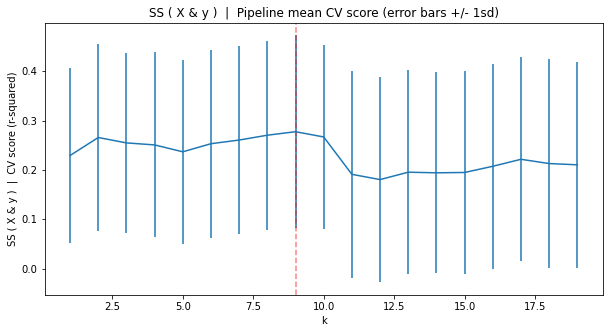

In [51]:
best_k_SS = lr_grid_cv_SS.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS, score_mean_SS, yerr=score_std_SS)
plt.axvline(x=best_k_SS, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X & y )  |  CV score (r-squared)')
plt.title('SS ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

**Fit & assess performance using cross-validation**

In [52]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [53]:
rf_default_cv_results = cross_validate(RF_pipe, X_train_SS, y_train_SS, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [54]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.54288899, 0.26566395, 0.40444542, 0.38399338, 0.12439777])

In [55]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.3442779000921818, 0.14083411580502048)

**Hyperparameter search using GridSearchCV**

In [56]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [57]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [58]:
rf_grid_cv.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [59]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [60]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train_SS, y_train_SS, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.56615285, 0.30593241, 0.40056841, 0.35763306, 0.1452982 ])

In [61]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.3551169856347564, 0.13641945761999008)

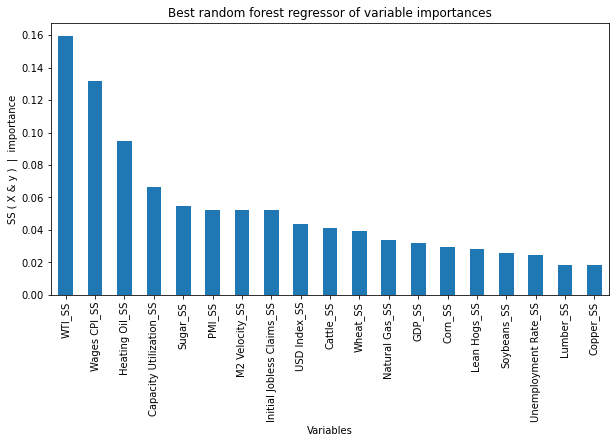

In [62]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train_SS.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('SS ( X & y )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.2 X only ( `_SS_y_uns` )**<a id='ss_y_un'></a>

In [63]:
pipe_SS_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [64]:
k_SS_y_uns = [k_SS_y_uns+1 for k_SS_y_uns in range(len(X_train_SS_y_uns.columns))]
grid_params_SS_y_uns = {'selectkbest__k': k_SS_y_uns}

In [65]:
lr_grid_cv_SS_y_uns = GridSearchCV(pipe_SS_y_uns, param_grid=grid_params_SS_y_uns, cv=5, n_jobs=-1)

In [66]:
lr_grid_cv_SS_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000246984865E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [67]:
score_mean_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['mean_test_score']
score_std_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['std_test_score']
cv_k_SS_y_uns = [k_SS_y_uns for k_SS_y_uns in lr_grid_cv_SS_y_uns.cv_results_['param_selectkbest__k']]

In [68]:
lr_grid_cv_SS_y_uns.best_params_

{'selectkbest__k': 9}

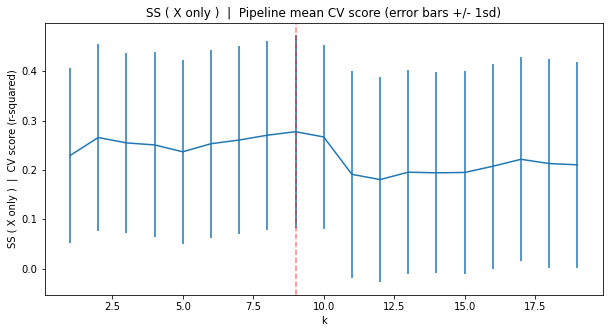

In [69]:
best_k_SS_y_uns = lr_grid_cv_SS_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_y_uns, score_mean_SS_y_uns, yerr=score_std_SS_y_uns)
plt.axvline(x=best_k_SS_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X only )  |  CV score (r-squared)')
plt.title('SS ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [70]:
RF_pipe_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [71]:
rf_default_cv_results_y_uns = cross_validate(RF_pipe_y_uns, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [72]:
rf_cv_scores_y_uns = rf_default_cv_results_y_uns['test_score']
rf_cv_scores_y_uns

array([0.53539096, 0.26432601, 0.39997215, 0.37873998, 0.11896142])

In [73]:
np.mean(rf_cv_scores_y_uns), np.std(rf_cv_scores_y_uns)

(0.3394781031499834, 0.13989876138772697)

**Hyperparameter search using GridSearchCV**

In [74]:
n_est_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [75]:
rf_grid_cv_y_uns = GridSearchCV(RF_pipe_y_uns, param_grid=grid_params_y_uns, cv=5, n_jobs=-1)

In [76]:
rf_grid_cv_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [77]:
rf_grid_cv_y_uns.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [78]:
rf_best_cv_results_y_uns = cross_validate(rf_grid_cv_y_uns.best_estimator_, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)
rf_best_scores_y_uns = rf_best_cv_results_y_uns['test_score']
rf_best_scores_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.56638598, 0.3017069 , 0.38953623, 0.35249636, 0.13432597])

In [79]:
np.mean(rf_best_scores_y_uns), np.std(rf_best_scores_y_uns)

(0.34889028742307254, 0.13945149015711306)

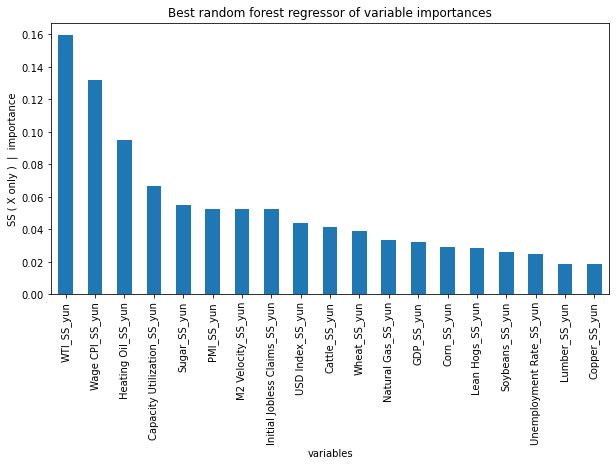

In [80]:
plt.subplots(figsize=(10, 5))
imps_y_uns = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_y_uns = pd.Series(imps_y_uns, index=X_train_SS_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_y_uns.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('SS ( X only )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.3 X & y ( `_LG` )**<a id='lg_both'></a>

In [81]:
pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # LogisticRegression() is for predicting 0 & 1
)

In [82]:
k_LG = [k_LG+1 for k_LG in range(len(X_train_LG.columns))]
grid_params_LG = {'selectkbest__k': k_LG}

In [83]:
lr_grid_cv_LG = GridSearchCV(pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [84]:
lr_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000246984865E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [85]:
score_mean_LG = lr_grid_cv_LG.cv_results_['mean_test_score']
score_std_LG = lr_grid_cv_LG.cv_results_['std_test_score']
cv_k_LG = [k_LG for k_LG in lr_grid_cv_LG.cv_results_['param_selectkbest__k']]

In [86]:
lr_grid_cv_LG.best_params_

{'selectkbest__k': 16}

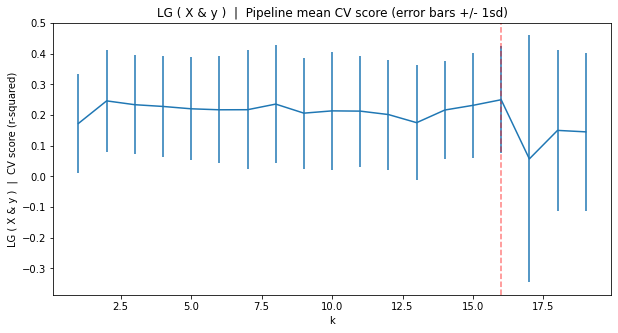

In [87]:
best_k_LG = lr_grid_cv_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG, score_mean_LG, yerr=score_std_LG)
plt.axvline(x=best_k_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X & y )  |  CV score (r-squared)')
plt.title('LG ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [88]:
RF_pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [89]:
rf_default_cv_results_LG = cross_validate(RF_pipe_LG, X_train_LG, y_train_LG, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [90]:
rf_cv_scores_LG = rf_default_cv_results_LG['test_score']
rf_cv_scores_LG

array([0.55640777, 0.26929799, 0.43065444, 0.37313693, 0.11771625])

In [91]:
np.mean(rf_cv_scores_LG), np.std(rf_cv_scores_LG)

(0.34944267576644605, 0.1483992081611681)

**Hyperparameter search using GridSearchCV**

In [92]:
n_est_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [93]:
rf_grid_cv_LG = GridSearchCV(RF_pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [94]:
rf_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [95]:
rf_grid_cv_LG.best_params_

{'powertransformer': None,
 'randomforestregressor__n_estimators': 42,
 'simpleimputer__strategy': 'mean'}

In [96]:
rf_best_cv_results_LG = cross_validate(rf_grid_cv_LG.best_estimator_, X_train_LG, y_train_LG, cv=5)
rf_best_scores_LG = rf_best_cv_results_LG['test_score']
rf_best_scores_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.54688214, 0.23298632, 0.47792003, 0.3867005 , 0.12515904])

In [97]:
np.mean(rf_best_scores_LG), np.std(rf_best_scores_LG)

(0.3539296070966673, 0.15533285907550348)

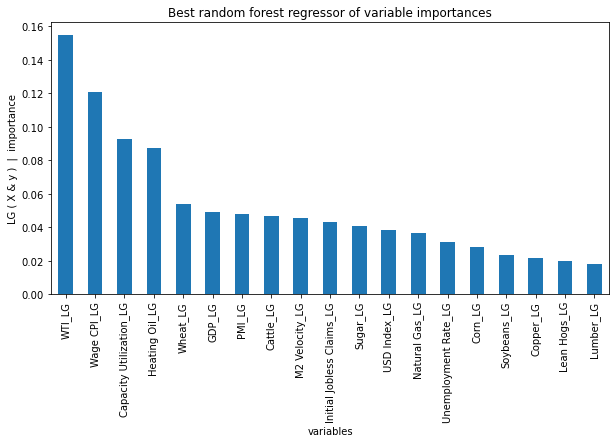

In [98]:
plt.subplots(figsize=(10, 5))
imps_LG = rf_grid_cv_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG = pd.Series(imps_LG, index=X_train_LG.columns).sort_values(ascending=False)
rf_feat_imps_LG.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('LG ( X & y )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.4 X only ( `_LG_y_uns` )**<a id='lg_y_un'></a>

In [99]:
pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [100]:
k_LG_y_uns = [k_LG_y_uns+1 for k_LG_y_uns in range(len(X_train_LG_y_uns.columns))]
grid_params_LG_y_uns = {'selectkbest__k': k_LG_y_uns}

In [101]:
lr_grid_cv_LG_y_uns = GridSearchCV(pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [102]:
lr_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000246984865E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [103]:
score_mean_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['mean_test_score']
score_std_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['std_test_score']
cv_k_LG_y_uns = [k_LG_y_uns for k_LG_y_uns in lr_grid_cv_LG_y_uns.cv_results_['param_selectkbest__k']]

In [104]:
lr_grid_cv_LG_y_uns.best_params_

{'selectkbest__k': 2}

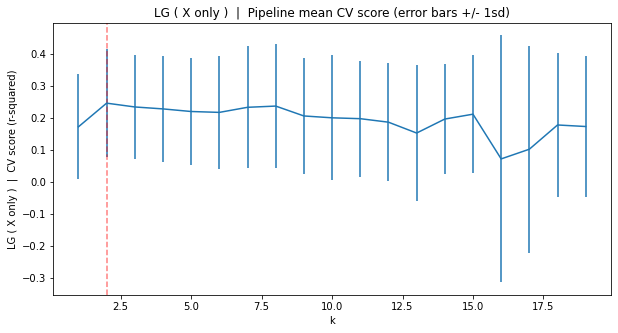

In [105]:
best_k_LG_y_uns = lr_grid_cv_LG_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG_y_uns, score_mean_LG_y_uns, yerr=score_std_LG_y_uns)
plt.axvline(x=best_k_LG_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X only )  |  CV score (r-squared)')
plt.title('LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [106]:
RF_pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [107]:
rf_default_cv_results_LG_y_uns = cross_validate(RF_pipe_LG_y_uns, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [108]:
rf_cv_scores_LG_y_uns = rf_default_cv_results_LG_y_uns['test_score']
rf_cv_scores_LG_y_uns

array([0.53508732, 0.26454595, 0.40680349, 0.38122595, 0.11746395])

In [109]:
np.mean(rf_cv_scores_LG_y_uns), np.std(rf_cv_scores_LG_y_uns)

(0.3410253318268131, 0.14101893198510382)

**Hyperparameter search using GridSearchCV**

In [110]:
n_est_LG_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [111]:
rf_grid_cv_LG_y_uns = GridSearchCV(RF_pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [112]:
rf_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [113]:
rf_grid_cv_LG_y_uns.best_params_

{'powertransformer': PowerTransformer(),
 'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean'}

In [114]:
rf_best_cv_results_LG_y_uns = cross_validate(rf_grid_cv_LG_y_uns.best_estimator_, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)
rf_best_scores_LG_y_uns = rf_best_cv_results_LG_y_uns['test_score']
rf_best_scores_LG_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.56609839, 0.29861832, 0.39369591, 0.35292386, 0.13431136])

In [115]:
np.mean(rf_best_scores_LG_y_uns), np.std(rf_best_scores_LG_y_uns)

(0.34912956945386736, 0.13983867311674578)

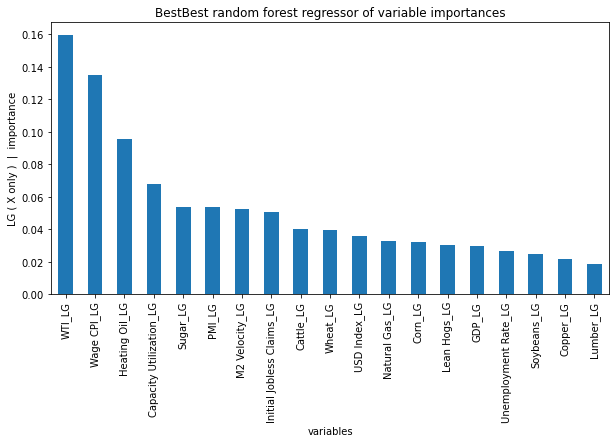

In [116]:
plt.subplots(figsize=(10, 5))
imps_LG_y_uns = rf_grid_cv_LG_y_uns.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG_y_uns = pd.Series(imps_LG_y_uns, index=X_train_LG_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_LG_y_uns.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('LG ( X only )  |  importance')
plt.title('BestBest random forest regressor of variable importances');

**5.4.5 Combination of `SS` & `LG` for X only ( `_SS_LG` )**<a id='combo'></a>

In [117]:
pipe__SS_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [118]:
k_SS_LG = [k_SS_LG+1 for k_SS_LG in range(len(X_tr_SS_LG.columns))]
grid_params_SS_LG = {'selectkbest__k': k_SS_LG}

In [119]:
lr_grid_cv_SS_LG = GridSearchCV(pipe__SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [120]:
lr_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000246984865E0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [121]:
score_mean_SS_LG = lr_grid_cv_SS_LG.cv_results_['mean_test_score']
score_std_SS_LG = lr_grid_cv_SS_LG.cv_results_['std_test_score']
cv_k_SS_LG = [k_SS_LG for k_SS_LG in lr_grid_cv_SS_LG.cv_results_['param_selectkbest__k']]

In [122]:
lr_grid_cv_SS_LG.best_params_

{'selectkbest__k': 7}

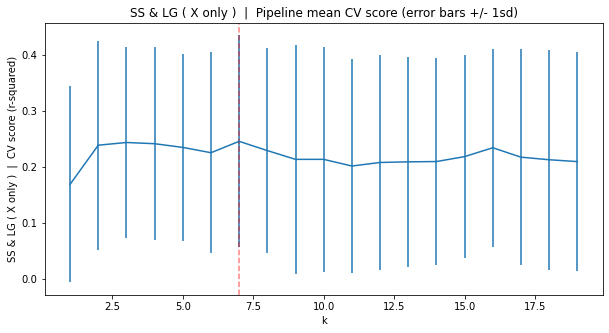

In [123]:
best_k_SS_LG = lr_grid_cv_SS_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_LG, score_mean_SS_LG, yerr=score_std_SS_LG)
plt.axvline(x=best_k_SS_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS & LG ( X only )  |  CV score (r-squared)')
plt.title('SS & LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [124]:
RF_pipe_SS_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [125]:
rf_default_cv_results_SS_LG = cross_validate(RF_pipe_SS_LG, X_tr_SS_LG, y_tr_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [126]:
rf_cv_scores_SS_LG = rf_default_cv_results_SS_LG['test_score']
rf_cv_scores_SS_LG

array([0.52747076, 0.26722429, 0.41757566, 0.36677184, 0.12027908])

In [127]:
np.mean(rf_cv_scores_SS_LG), np.std(rf_cv_scores_SS_LG)

(0.3398643267525429, 0.13816909323560148)

**Hyperparameter search using GridSearchCV**

In [128]:
n_est_SS_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_SS_LG = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_SS_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [129]:
rf_grid_cv_SS_LG = GridSearchCV(RF_pipe_SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [130]:
rf_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [131]:
rf_grid_cv_SS_LG.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [132]:
rf_best_cv_results_SS_LG = cross_validate(rf_grid_cv_SS_LG.best_estimator_, X_tr_SS_LG, y_tr_y_uns, cv=5)
rf_best_scores_SS_LG = rf_best_cv_results_SS_LG['test_score']
rf_best_scores_SS_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.56954685, 0.29943012, 0.4075392 , 0.35284671, 0.14347374])

In [133]:
np.mean(rf_best_scores_SS_LG), np.std(rf_best_scores_SS_LG)

(0.3545673242113222, 0.139014953785226)

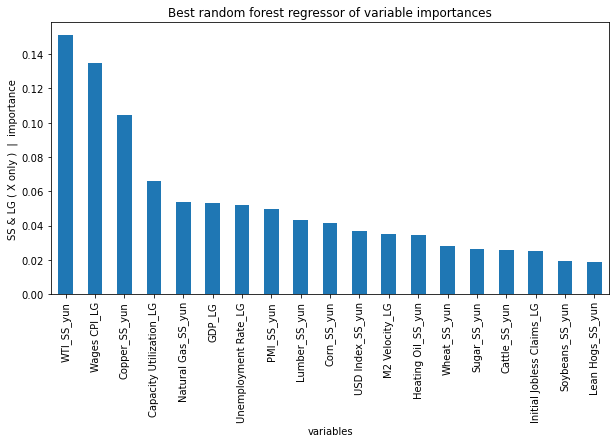

In [134]:
plt.subplots(figsize=(10, 5))
imps_SS_LG = rf_grid_cv_SS_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_SS_LG = pd.Series(imps_SS_LG, index=X_tr_SS_LG.columns).sort_values(ascending=False)
rf_feat_imps_SS_LG.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('SS & LG ( X only )  |  importance')
plt.title('Best random forest regressor of variable importances');

## 5.5 Initial Findings<a id='int_find'></a>

By and large, `Wages CPI` is a dominate variable in the model. This makes sense due to it's connection with `Inflation` itself. `Wages CPI` may also summarize `Initial Jobless Claims` & `Unemployment Rate` leaving them potentially redundant.

Although Financial data may be difficult to model, `WTI` is #2 on all approaches. I believe this makes sense given it's incorporated in just about every activity & purchase that is made in the United States. Take for example a loaf of bread. The grains required to make dough are usually plowed by a tractor using gasoline ( which is made with oil ). It is then transported to a bakery ( using gasoline ). It's then transported to a store, purchased by a customer & driven home ( all using a derivative of oil ). 

## 5.6 Modeling with Most important Variables<a id='mod_imp'></a>

We will now rerun the modeling process using only `Wages CPI` & `WTI`. Before so, we will pull back in fresh sets of data to ensure cleanliness​ & then drop "the others".

In [135]:
# StandardScaler | X & y scaled
X_train_SS_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS.xlsx', index_col=None)
y_train_SS_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS.xlsx', index_col=None)
X_test_SS_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS.xlsx', index_col=None)
y_test_SS_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS.xlsx', index_col=None)

# Standard Scaler | X only scaled
X_train_SS_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx', index_col=None)
y_train_SS_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx', index_col=None)
X_test_SS_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx', index_col=None)
y_test_SS_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx', index_col=None)

# Log Scaler | X & y scaled
X_train_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG.xlsx', index_col=None)
y_train_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG.xlsx', index_col=None)
X_test_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG.xlsx', index_col=None)
y_test_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# Log Scaler | X only scaled
X_train_LG_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx', index_col=None)
y_train_LG_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx', index_col=None)
X_test_LG_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx', index_col=None)
y_test_LG_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx', index_col=None)
y_tr_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx', index_col=None)
X_te_SS_LG_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx', index_col=None)
y_te_y_uns_two = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_te_y_uns.xlsx', index_col=None)

print('Finished; proceed.')

Finished; proceed.


Below we will assign the columns to drop on both the `X` & `y` data sets.

In [137]:
y_prev_cols = ['Unnamed: 0']

In [138]:
X_prev_cols_SS = ['Unnamed: 0','Copper_SS', 'Soybeans_SS',
       'Natural Gas_SS', 'Heating Oil_SS', 'Corn_SS', 'Wheat_SS', 'Cattle_SS',
       'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS', 'Capacity Utilization_SS',
       'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']

We will now drop them.

In [139]:
# StandardScaler | X & y scaled
X_train_SS_two.drop(columns=X_prev_cols_SS, inplace=True)
y_train_SS_two.drop(columns=y_prev_cols, inplace=True)
X_test_SS_two.drop(columns=X_prev_cols_SS, inplace=True)
y_test_SS_two.drop(columns=y_prev_cols, inplace=True)

print('Finished; proceed.')

Finished; proceed.


In [140]:
X_prev_cols_SS_yun = ['Unnamed: 0', 'Copper_SS_yun',
       'Soybeans_SS_yun', 'Natural Gas_SS_yun', 'Heating Oil_SS_yun',
       'Corn_SS_yun', 'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun',
       'Sugar_SS_yun', 'Lumber_SS_yun', 'Capacity Utilization_SS_yun',
       'GDP_SS_yun', 'M2 Velocity_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Initial Jobless Claims_SS_yun', 'Unemployment Rate_SS_yun']

In [141]:
# Standard Scaler | X only scaled
X_train_SS_y_uns_two.drop(columns=X_prev_cols_SS_yun, inplace=True)
y_train_SS_y_uns_two.drop(columns=y_prev_cols, inplace=True)
X_test_SS_y_uns_two.drop(columns=X_prev_cols_SS_yun, inplace=True)
y_test_SS_y_uns_two.drop(columns=y_prev_cols, inplace=True)
print('Finished; proceed.')

Finished; proceed.


In [142]:
X_prev_cols_LG = ['Unnamed: 0', 'Copper_LG', 'Soybeans_LG',
       'Natural Gas_LG', 'Heating Oil_LG', 'Corn_LG', 'Wheat_LG', 'Cattle_LG',
       'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG', 'Capacity Utilization_LG',
       'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

In [143]:
# Log Scaler | X & y scaled
X_train_LG_two.drop(columns=X_prev_cols_LG, inplace=True)
y_train_LG_two.drop(columns=y_prev_cols, inplace=True)
X_test_LG_two.drop(columns=X_prev_cols_LG, inplace=True)
y_test_LG_two.drop(columns=y_prev_cols, inplace=True)
print('Finished; proceed.')

Finished; proceed.


In [144]:
X_prev_cols_LG_y_uns = ['Unnamed: 0','Copper_LG', 'Soybeans_LG',
       'Natural Gas_LG', 'Heating Oil_LG', 'Corn_LG', 'Wheat_LG', 'Cattle_LG',
       'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG', 'Capacity Utilization_LG',
       'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

In [145]:
# Log Scaler | X only scaled
X_train_LG_y_uns_two.drop(columns=X_prev_cols_LG_y_uns, inplace=True)
y_train_LG_y_uns_two.drop(columns=y_prev_cols, inplace=True)
X_test_LG_y_uns_two.drop(columns=X_prev_cols_LG_y_uns, inplace=True)
y_test_LG_y_uns_two.drop(columns=y_prev_cols, inplace=True)
print('Finished; proceed.')

Finished; proceed.


In [146]:
X_prev_cols_LG_y_uns = ['Unnamed: 0','Copper_SS_yun', 'Soybeans_SS_yun',
       'Natural Gas_SS_yun', 'Heating Oil_SS_yun', 'Corn_SS_yun',
       'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun',
       'Lumber_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']

In [147]:
# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG_two.drop(columns=X_prev_cols_LG_y_uns, inplace=True)
y_tr_y_uns_two.drop(columns=y_prev_cols, inplace=True)
X_te_SS_LG_two.drop(columns=X_prev_cols_LG_y_uns, inplace=True)
y_te_y_uns_two.drop(columns=y_prev_cols, inplace=True)
print('Finished; proceed.')

Finished; proceed.


**5.6.1 X & y ( `_SS_two` )**<a id='ss_imp'></a>

In [148]:
reg_all_SS = LinearRegression(X_train_SS_two,y_train_SS_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS
0       -0.272503  0.770139
1        0.081334 -0.036542
2       -0.668041 -0.496463
3        0.427689  0.697303
4        0.073309 -0.130975
..            ...       ...
213     -1.469548 -1.079604
214     -0.956924 -0.948540
215      0.171832 -1.022849
216      0.323446  0.420422
217     -0.263450  0.806356

[218 rows x 2 columns], normalize=     Inflation_SS
0       -0.562434
1        0.804029
2       -0.426288
3        0.062092
4        0.466785
..            ...
213     -1.043320
214     -0.318869
215      0.476777
216      0.494264
217     -0.658611

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [149]:
lm = LinearRegression().fit(X_train_SS_two,y_train_SS_two)

In [150]:
y_tr_pred_SS_two = lm.predict(X_train_SS_two)
y_te_pred_SS_two = lm.predict(X_test_SS_two)

In [151]:
median_r2_SS = r2_score(y_train_SS_two, y_tr_pred_SS_two), r2_score(y_test_SS_two, y_te_pred_SS_two)
median_r2_SS

(0.2923681313966007, 0.4240302078454755)

In [152]:
median_mae_SS = mean_absolute_error( y_train_SS_two, y_tr_pred_SS_two ), mean_absolute_error( y_test_SS_two, y_te_pred_SS_two )
median_mae_SS

(0.5639042268290253, 0.5810986097687129)

In [153]:
median_mse_SS = mean_squared_error( y_train_SS_two, y_tr_pred_SS_two ), mean_squared_error( y_test_SS_two, y_te_pred_SS_two )
median_mse_SS

(0.7076318686033993, 0.6877395599516605)

**5.6.2 X only ( `_SS_y_uns_two` )**<a id='ss_imp_uns'></a>

In [154]:
reg_all_SS_y_uns = LinearRegression(X_train_SS_y_uns_two,y_train_SS_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS_yun  WTI_SS_yun
0           -0.272503    0.770139
1            0.081334   -0.036542
2           -0.668041   -0.496463
3            0.427689    0.697303
4            0.073309   -0.130975
..                ...         ...
213         -1.469548   -1.079604
214         -0.956924   -0.948540
215          0.171832   -1.022849
216          0.323446    0.420422
217         -0.263450    0.806356

[218 rows x 2 columns], normalize=     Inflation
0       -0.523
1        0.571
2       -0.414
3       -0.023
4        0.301
..         ...
213     -0.908
214     -0.328
215      0.309
216      0.323
217     -0.600

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [155]:
lm = LinearRegression().fit(X_train_SS_y_uns_two,y_train_SS_y_uns_two)

In [156]:
y_tr_pred_SS_y_uns_two = lm.predict(X_train_SS_y_uns_two)
y_te_pred_SS_y_uns_two = lm.predict(X_test_SS_y_uns_two)

In [157]:
median_r2_SS_y_uns_two = r2_score(y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two), r2_score(y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two)
median_r2_SS_y_uns_two

(0.29236813139660045, 0.34892190460918115)

In [158]:
median_mae_SS_y_uns_two = mean_absolute_error( y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two ), mean_absolute_error( y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two )
median_mae_SS_y_uns_two

(0.4514656985846598, 0.6126980813030144)

In [159]:
median_mse_SS_y_uns_two = mean_squared_error( y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two ), mean_squared_error( y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two )
median_mse_SS_y_uns_two

(0.45357196346904216, 0.7774229984237021)

**5.6.3 X & y ( `_LG_two` )**<a id='lg_imp'></a>

In [160]:
reg_all_LG_two = LinearRegression(X_train_LG_two,y_train_LG_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_LG    WTI_LG
0       -0.397872  0.760495
1       -0.011931 -0.081808
2       -0.796923 -0.534214
3        0.394366  0.681918
4       -0.021002 -0.176343
..            ...       ...
213     -1.511169 -1.080798
214     -1.068244 -0.960407
215      0.091424 -1.028833
216      0.268994  0.387757
217     -0.388347  0.799750

[218 rows x 2 columns], normalize=     Inflation_LG
0       -0.554933
1        0.808334
2       -0.416118
3        0.076718
4        0.478078
..            ...
213     -1.049346
214     -0.307001
215      0.487913
216      0.505117
217     -0.653323

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [161]:
lm = LinearRegression().fit(X_train_LG_two,y_train_LG_two)

In [162]:
y_tr_pred_LG_two = lm.predict(X_train_LG_two)
y_te_pred_LG_two = lm.predict(X_test_LG_two)

In [163]:
median_r2_LG_two = r2_score(y_train_LG_two, y_tr_pred_LG_two), r2_score(y_test_LG_two, y_te_pred_LG_two)
median_r2_LG_two

(0.28147110772740536, 0.3673257337177088)

In [164]:
median_mae_LG_two = mean_absolute_error( y_train_LG_two, y_tr_pred_LG_two ), mean_absolute_error( y_test_LG_two, y_te_pred_LG_two )
median_mae_LG_two

(0.572734312022224, 0.5979566321547266)

In [165]:
median_mse_LG_two = mean_squared_error( y_train_LG_two, y_tr_pred_LG_two ), mean_squared_error( y_test_LG_two, y_te_pred_LG_two )
median_mse_LG_two

(0.7185288922725946, 0.7762905719353863)

**5.6.4 X & y ( `_LG_y_uns_two` )**<a id='ss_lg_imp'></a>

In [166]:
reg_all_LG_y_uns_two = LinearRegression(X_train_LG_y_uns_two,y_train_LG_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_LG    WTI_LG
0       -0.397872  0.760495
1       -0.011931 -0.081808
2       -0.796923 -0.534214
3        0.394366  0.681918
4       -0.021002 -0.176343
..            ...       ...
213     -1.511169 -1.080798
214     -1.068244 -0.960407
215      0.091424 -1.028833
216      0.268994  0.387757
217     -0.388347  0.799750

[218 rows x 2 columns], normalize=     Inflation
0       -0.523
1        0.571
2       -0.414
3       -0.023
4        0.301
..         ...
213     -0.908
214     -0.328
215      0.309
216      0.323
217     -0.600

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [167]:
lm = LinearRegression().fit(X_train_LG_y_uns_two,y_train_LG_y_uns_two)

In [168]:
y_tr_pred_LG_y_uns_two = lm.predict(X_train_LG_y_uns_two)
y_te_pred_LG_y_uns_two = lm.predict(X_test_LG_y_uns_two)

In [169]:
median_r2_LG_y_uns_two = r2_score(y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two), r2_score(y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two)
median_r2_LG_y_uns_two

(0.2778182024710858, 0.2979043416106304)

In [170]:
median_mae_LG_y_uns_two = mean_absolute_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_absolute_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mae_LG_y_uns_two

(0.45723904177514785, 0.627202595874049)

In [171]:
median_mse_LG_y_uns_two = mean_squared_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_squared_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mse_LG_y_uns_two

(0.46289805535931483, 0.8614705374491236)

**5.6.5 X only ( `_SS_LG_two` )**<a id='ss_lg_imp_n'></a>

In [172]:
reg_all_SS_LG_two = LinearRegression(X_tr_SS_LG_two,y_tr_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     WTI_SS_yun  Wages CPI_LG
0      0.770139     -0.397872
1     -0.036542     -0.011931
2     -0.496463     -0.796923
3      0.697303      0.394366
4     -0.130975     -0.021002
..          ...           ...
213   -1.079604     -1.511169
214   -0.948540     -1.068244
215   -1.022849      0.091424
216    0.420422      0.268994
217    0.806356     -0.388347

[218 rows x 2 columns], normalize=     Inflation
0       -0.523
1        0.571
2       -0.414
3       -0.023
4        0.301
..         ...
213     -0.908
214     -0.328
215      0.309
216      0.323
217     -0.600

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [173]:
lm = LinearRegression().fit(X_tr_SS_LG_two,y_tr_y_uns_two)

In [174]:
y_tr_pred_SS_LG_two = lm.predict(X_tr_SS_LG_two)
y_te_pred_SS_LG_two = lm.predict(X_te_SS_LG_two)

In [175]:
median_r2_SS_LG_two = r2_score(y_tr_y_uns_two, y_tr_pred_SS_LG_two), r2_score(y_te_y_uns_two, y_te_pred_SS_LG_two)
median_r2_SS_LG_two

(0.2840045428629028, 0.37606902602990677)

In [176]:
median_mae_SS_LG_two = mean_absolute_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_absolute_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mae_SS_LG_two

(0.45723904177514785, 0.627202595874049)

In [177]:
median_mse_SS_LG_two = mean_squared_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_squared_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mse_SS_LG_two

(0.46289805535931483, 0.8614705374491236)

## 5.7 Conclusion<a id='conclusion'></a>

We utilized the random forest model to determine which variables were of most importance in understanding `Inflation`; there are `Wages CPI` & `WTI`. 

We then isolated these two ( 2 ) variables to model against `Inflation`; we will summarize the findings below:

In [178]:
print(' R² results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),

      '\n','LG Train |',round(median_r2_LG_two[0],4),'  Test', round(median_r2_LG_two[1],4),'\n','\n',

     'R² results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns_two[0],4),'  Test', round(median_r2_SS_y_uns_two[1],4),

      '\n','LG Train |',round(median_r2_LG_y_uns_two[0],4),'  Test', round(median_r2_LG_y_uns_two[1],4),'\n','\n'

      ' R² results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG_two[0],4),'  Test', round(median_r2_SS_LG_two[1],4),

     )

 R² results for X & y scaled below 
 SS Train | 0.2924   Test 0.424 
 LG Train | 0.2815   Test 0.3673 
 
 R² results for X only scaled below 
 SS Train | 0.2924   Test 0.3489 
 LG Train | 0.2778   Test 0.2979 
 
 R² results for the LG & SS combination below 
 SS Train | 0.284   Test 0.3761


After removing variables which were deemed to be hurting the performance with the Random Forest Model, the results show a marginal benifit. The `SS` on the `X` & `y` scaled proved to be the best. This benifit is most notably shown as no negative outputs on either the training or test sets. 

Below we will look at the `mae` & `mse` scores as well.

In [179]:
print(' MAE results for X & y scaled below',
    '\n','SS Train |',round(median_mae_SS[0],4),'  Test', round(median_mae_SS[1],4),
     
      '\n','LG Train |',round(median_mae_LG_two[0],4),'  Test', round(median_mae_LG_two[1],4),'\n','\n',
      
     'MAE results for X only scaled below',
    '\n','SS Train |',round(median_mae_SS_y_uns_two[0],4),'  Test', round(median_mae_SS_y_uns_two[1],4),
     
      '\n','LG Train |',round(median_mae_LG_y_uns_two[0],4),'  Test', round(median_mae_LG_y_uns_two[1],4),'\n','\n',
      
      'MAE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mae_SS_LG_two[0],4),'  Test', round(median_mae_SS_LG_two[1],4),
      
     )

 MAE results for X & y scaled below 
 SS Train | 0.5639   Test 0.5811 
 LG Train | 0.5727   Test 0.598 
 
 MAE results for X only scaled below 
 SS Train | 0.4515   Test 0.6127 
 LG Train | 0.4572   Test 0.6272 
 
 MAE results for the LG & SS combination below 
 SS Train | 0.4572   Test 0.6272


In [180]:
print(' MSE results for X & y scaled below',
    '\n','SS Train |',round(median_mse_SS[0],4),'  Test', round(median_mse_SS[1],4),
      
      '\n','LG Train |',round(median_mse_LG_two[0],4),'  Test', round(median_mse_LG_two[1],4),
      '\n','\n',
     'MSE results for X only scaled below',
    '\n','SS Train |',round(median_mse_SS_y_uns_two[0],4),'  Test', round(median_mse_SS_y_uns_two[1],4),
      
      '\n','LG Train |',round(median_mse_LG_y_uns_two[0],4),'  Test', round(median_mse_LG_y_uns_two[1],4),
      '\n','\n',
      'MSE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mse_SS_LG_two[0],4),'  Test', round(median_mse_SS_LG_two[1],4),
     
     )

 MSE results for X & y scaled below 
 SS Train | 0.7076   Test 0.6877 
 LG Train | 0.7185   Test 0.7763 
 
 MSE results for X only scaled below 
 SS Train | 0.4536   Test 0.7774 
 LG Train | 0.4629   Test 0.8615 
 
 MSE results for the LG & SS combination below 
 SS Train | 0.4629   Test 0.8615


These show drops in all with the exception of `SS` `X only` which saw an increase of 3.5 bps & 14.4 bps on `MAE` & `MSE` respectively. 

As the `R²` for `SS` `X & y` in the test set presented the best results with the lowest `mae` & `mse`, I confirm this is the final selection as the test set is the arbiter.

As for a recap, we have now gone through the machine learning process with the help of Random Forests to:
   * Scale the data effectively
   * Identify the most important variables

I will end with a comparison of where we started to where we ended. 

We started with 19 variables which best correlated with `Inflation`. We then used discrete tacks to fill the data gaps & using a rolling average on all was determined the best: results below:

In [181]:
r_squared_rolling = 0.2540058046120104
mae_rolling = 0.5629835145954647
mse_rolling = 0.7556127599870052

print(' R2   |  ', round(0.2540058046120104,4),'\n',
      'MAE  |  ', round(0.5629835145954647,4),'\n',
      'MSE  |  ', round(0.7556127599870052,4)

)

 R2   |   0.254 
 MAE  |   0.563 
 MSE  |   0.7556


We then reviewed `Standard Scaling` (`SS`), `MinMax Scaling` (`MM`) & `Log Transformation` (`LG`) on the X & y variables; as well as X only.

During the process it was determined that a potential combination of `SS` & `LG` may work. `y` was not scaled while all the `X` variables were scaled with `SS` with the exception of the below which were scaled with `LG`:
   * `Wages CPI`
   * `Capacity Utilization`
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims`
   * `Unemployment Rate`

In [182]:
print( ' R² results for X & y scaled below',
    '\n','SS Train |',round(0.3966,4),'  Test', round(0.2796,4),

      '\n','MM Train |',round(0.0424,4),'  Test', round(-0.1085,4),

      '\n','LG Train |',round(0.4149,4),'  Test', round(-23.8319,4),'\n','\n',
      
     'R² results for X only scaled below',
    '\n','SS Train |',round(0.4185,4),'  Test', round(0.254,4),

      '\n','MM Train |',round(-0.2444,4),' Test', round(-0.0533,4),

      '\n','LG Train |',round(0.4142,4),'  Test', round(-23.4693,4),'\n','\n',
      
      'R² results for the LG & SS combination below',
    '\n','SS Train |',round(0.4067,4),'  Test', round(-22.811,4),'\n','\n',
      
      'R² averages of LG & SS X only scaled below',
    '\n','Av. Train |',round(0.4164,4),
      '  Test', round(-11.6077,4),
     )

 R² results for X & y scaled below 
 SS Train | 0.3966   Test 0.2796 
 MM Train | 0.0424   Test -0.1085 
 LG Train | 0.4149   Test -23.8319 
 
 R² results for X only scaled below 
 SS Train | 0.4185   Test 0.254 
 MM Train | -0.2444  Test -0.0533 
 LG Train | 0.4142   Test -23.4693 
 
 R² results for the LG & SS combination below 
 SS Train | 0.4067   Test -22.811 
 
 R² averages of LG & SS X only scaled below 
 Av. Train | 0.4164   Test -11.6077


It was determined that `MM` did not work. We then ran the others through Random Forest modeling to determine which variables were best helping our cause. I am presenting below the results for `SS` on both `X` & `y` below but all of the x5 configurations showed the same result:

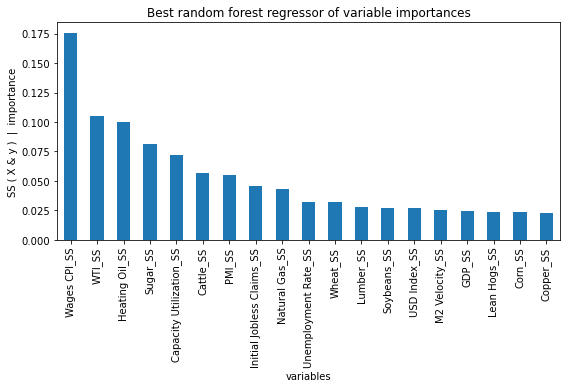

In [183]:
plt.subplots(figsize=(9, 4))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train_SS.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('SS ( X & y )  |  importance')
plt.title('Best random forest regressor of variable importances');

With this, `Wages CPI` & `WTI` were chosen to run against `Inflation` alone on a `SS` on both `X` & `y` configuration. The results below:

In [184]:
print(' R² results for X & y scaled below',
    '\n','Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),'\n','\n',

     'MAE results for X & y scaled below',
    '\n','Train |',round(median_mae_SS[0],4),'  Test', round(median_mae_SS[1],4),'\n','\n'

      ' MSE results for X & y scaled below',
    '\n','Train |',round(median_mse_SS[0],4),'  Test', round(median_mse_SS[1],4),

     )

 R² results for X & y scaled below 
 Train | 0.2924   Test 0.424 
 
 MAE results for X & y scaled below 
 Train | 0.5639   Test 0.5811 
 
 MSE results for X & y scaled below 
 Train | 0.7076   Test 0.6877


So how do these test results compare to those seen **after rolling averages on the unscaled 19 variables?** ( see below )

In [185]:
print(' A', round(((median_r2_SS[1] - r_squared_rolling)*100),2), 'bps increase in R²;',
      round((((median_r2_SS[1] / r_squared_rolling)-1)*100),2),'% increase.','\n','\n',

     'A', round(((median_mae_SS[1] - mae_rolling)*100),2), 'bps increase in MAE.','\n','\n',

      'A', round(((median_mse_SS[1] - mse_rolling)*100),2), 'bps decrease in MSE.')

 A 17.0 bps increase in R²; 66.94 % increase. 
 
 A 1.81 bps increase in MAE. 
 
 A -6.79 bps decrease in MSE.


Further to this, how do these test results compare to those seen **after rolling averages on the `SS` `X & y` scaled 19 variables** ( the best of the scaling approaches )? ( see below )

In [186]:
r_squared_SS = 0.27963587900831854
mae_SS = 0.684026744163606
mse_SS = 0.860154317681419

print(' A', round(((median_r2_SS[1] - r_squared_SS)*100),2), 'bps increase in R²;',
      round((((median_r2_SS[1] / r_squared_SS)-1)*100),2),'% increase.','\n','\n',

     'A', round(((median_mae_SS[1] - mae_SS)*100),2), 'bps decrease in MAE.','\n','\n',

      'A', round(((median_mse_SS[1] - mse_SS)*100),2), 'bps decrease in MSE.',)

 A 14.44 bps increase in R²; 51.64 % increase. 
 
 A -10.29 bps decrease in MAE. 
 
 A -17.24 bps decrease in MSE.


Thus, `Wages CPI` & `WTI` it is. Thanks